In [172]:
import pandas as pd
import numpy as np

In [173]:
from sklearn.cluster import KMeans 

In [174]:
df=pd.read_csv('10_27_drop_dup.csv')

In [175]:
df.head()

,Unnamed: 0,Store ID,Total Visits,lat,lng,Store,Address,Place_ID,City,County,...,2022 Pop Age 15+: Divorced,2022 Pop Age 15+: Never Married,2022 Black Population,2022 White Population,2022 Hispanic Population,2022 Total Crime Index,2022 Personal Crime Index,2022 Property Crime Index,ZIPcode,Salaries and wages
0,0,817.0,471157,30.652834,-87.906628,T.J. Maxx,"6850 US Highway 90, Daphne, AL, United States",184037865,Daphne,Baldwin County,...,2230,5000,1742,17021,959,85,52,91,36527.0,541670.0
1,1,1166.0,458653,30.375841,-87.678477,T.J. Maxx,"2601 South McKenzie St., Foley, AL, United St...",17015168,Foley,Baldwin County,...,2819,4795,2181,16654,2873,168,99,179,36535.0,454080.0
2,2,1446.0,560818,30.377885,-87.686324,Marshalls,"South Pine Street, Foley, Alabama, United States",101466848,Foley,Baldwin County,...,3395,5861,2485,20242,3251,170,100,182,36535.0,454080.0
3,3,73.0,757204,34.825708,-87.625627,T.J. Maxx,"187 Cox Creek Pkwy, Florence, AL, United States",207765010,Florence,Lauderdale County,...,4641,10768,6359,27869,2019,154,106,162,35630.0,384844.0
4,4,27.0,710596,31.246014,-85.424775,T.J. Maxx,"3500 Ross Clark Cir, Dothan, AL, United States",95180820,Dothan,Houston County,...,5052,11758,16743,22437,1887,179,218,172,36303.0,517778.0


In [176]:
# df=df.drop(['Unnamed: 0','Store ID','lat','lng','Store'，'Address','Place_ID','City','County','State','zipcode','GEOID','TRACT','StateID','CountyID','ZIPcode'], axis = 1)

In [177]:
import re

In [178]:
dflist = df.dtypes[df.dtypes!=object].index
ID_list= [i for i in df.columns if re.findall("ID",i)]


In [179]:
use_list=list(set(dflist)-set(ID_list))
x=df[use_list]

In [180]:
x

,2022 Tapestry Adult Pop Base,2022 Furniture/Home Furnish Sales ($000) (SIC),2022 Home Improvement Sales ($000) (SIC),2022 Total Daytime Population,lng,non_family,Total Visits,2022 Total Population,TRACT,2022 Median Age,...,2022 Pop Age 15+: Married,2022 Personal Crime Index,2022 Hispanic Population,zipcode,2022 Population Density,2022 Discount Store Clothes Just as Good: 4-Agr Cmpl,family,2022 Renter Occupied HUs,2022 Apparel/Accessory Sales ($000) (SIC),2022 Bought Clothing in Dept Store/6 Mo
0,16903,40393,110747,22175,-87.906628,635,471157,20890,10704,43.7,...,9207,52,959,36527,914.7,4969,5471,1934,19613,6447
1,17883,31920,122990,25262,-87.678477,2214,458653,22655,11503,41.5,...,8913,99,2873,36535,681.7,5797,5937,2850,43850,6540
2,21405,31972,127647,28327,-87.686324,2214,560818,27129,11503,41.6,...,10589,100,3251,36535,658.0,6866,5937,3360,44188,7831
3,31731,39819,88019,51236,-87.625627,737,757204,38342,10800,41.4,...,14968,106,2019,35630,735.9,9910,2658,7967,34372,11301
4,33712,158841,202917,58142,-85.424775,386,710596,43277,40400,39.9,...,15729,218,1887,36303,1082.1,11059,2031,8138,68297,12290
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
318,22935,50607,48620,37513,-81.026595,827,264460,26388,81101,51.7,...,9603,207,2327,32118,2758.7,7067,1795,5634,18644,7903
319,126795,161451,486996,139786,-82.730174,1190,201749,151706,22501,48.3,...,56539,104,17032,33764,4157.2,39098,4338,19688,117690,45683
320,72461,39414,309214,86363,-81.209877,697,150855,87489,21314,33.4,...,36598,42,19225,32765,2478.5,21521,3354,9474,11011,27056
321,54775,69477,362757,64095,-82.423374,450,127309,59690,2505,65.9,...,31785,39,2891,34293,2143.9,15738,1832,5902,18102,19363


In [181]:
x.isnull().sum()

2022 Tapestry Adult Pop Base                             0
2022 Furniture/Home Furnish Sales ($000) (SIC)           0
2022 Home Improvement Sales ($000) (SIC)                 0
2022 Total Daytime Population                            0
lng                                                      0
non_family                                               0
Total Visits                                             0
2022 Total Population                                    0
TRACT                                                    0
2022 Median Age                                          0
2022 Bought Clothing in Discount Store/6 Mo              0
ZIPcode                                                 23
2022 Pop Age 25+: Grad/Professional Degree               0
2022 Black Population                                    0
2022 White Population                                    0
2022 Bought Clothing Online/6 Mo                         0
2022 Median Home Value                                  

In [182]:
df=x.drop(['lng','TRACT','ZIPcode','lat','Unnamed: 0','zipcode'], axis = 1)

In [183]:
df

,2022 Tapestry Adult Pop Base,2022 Furniture/Home Furnish Sales ($000) (SIC),2022 Home Improvement Sales ($000) (SIC),2022 Total Daytime Population,non_family,Total Visits,2022 Total Population,2022 Median Age,2022 Bought Clothing in Discount Store/6 Mo,2022 Pop Age 25+: Grad/Professional Degree,...,TractPopulation,2022 Pop Age 15+: Married,2022 Personal Crime Index,2022 Hispanic Population,2022 Population Density,2022 Discount Store Clothes Just as Good: 4-Agr Cmpl,family,2022 Renter Occupied HUs,2022 Apparel/Accessory Sales ($000) (SIC),2022 Bought Clothing in Dept Store/6 Mo
0,16903,40393,110747,22175,635,471157,20890,43.7,2669,2355,...,6106,9207,52,959,914.7,4969,5471,1934,19613,6447
1,17883,31920,122990,25262,2214,458653,22655,41.5,2815,1359,...,8151,8913,99,2873,681.7,5797,5937,2850,43850,6540
2,21405,31972,127647,28327,2214,560818,27129,41.6,3360,1638,...,8151,10589,100,3251,658.0,6866,5937,3360,44188,7831
3,31731,39819,88019,51236,737,757204,38342,41.4,5064,2747,...,3412,14968,106,2019,735.9,9910,2658,7967,34372,11301
4,33712,158841,202917,58142,386,710596,43277,39.9,5028,2987,...,2450,15729,218,1887,1082.1,11059,2031,8138,68297,12290
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
318,22935,50607,48620,37513,827,264460,26388,51.7,3418,2484,...,2622,9603,207,2327,2758.7,7067,1795,5634,18644,7903
319,126795,161451,486996,139786,1190,201749,151706,48.3,19733,10803,...,5705,56539,104,17032,4157.2,39098,4338,19688,117690,45683
320,72461,39414,309214,86363,697,150855,87489,33.4,11328,10561,...,4131,36598,42,19225,2478.5,21521,3354,9474,11011,27056
321,54775,69477,362757,64095,450,127309,59690,65.9,9291,7604,...,2290,31785,39,2891,2143.9,15738,1832,5902,18102,19363


In [184]:
df=df[['TractPopulation','Salaries and wages','2022 Home Improvement Sales ($000) (SIC)','Total Visits']]

In [185]:
df=df.dropna()

In [186]:
type(df)

pandas.core.frame.DataFrame

In [187]:
df

,TractPopulation,Salaries and wages,2022 Home Improvement Sales ($000) (SIC),Total Visits
0,6106,541670.0,110747,471157
1,8151,454080.0,122990,458653
2,8151,454080.0,127647,560818
3,3412,384844.0,88019,757204
4,2450,517778.0,202917,710596
...,...,...,...,...
318,2622,317183.0,48620,264460
319,5705,616937.0,486996,201749
320,4131,1840749.0,309214,150855
321,2290,760511.0,362757,127309


In [188]:
df['total visit density']=df['Total Visits']/df['TractPopulation']
df['Salaries and wages density']=df['Salaries and wages']/df['TractPopulation']
df['Homeimprovement Sales density']=df['2022 Home Improvement Sales ($000) (SIC)']/df['TractPopulation']

In [189]:
df

,TractPopulation,Salaries and wages,2022 Home Improvement Sales ($000) (SIC),Total Visits,total visit density,Salaries and wages density,Homeimprovement Sales density
0,6106,541670.0,110747,471157,77.162954,88.711104,18.137406
1,8151,454080.0,122990,458653,56.269537,55.708502,15.088946
2,8151,454080.0,127647,560818,68.803582,55.708502,15.660287
3,3412,384844.0,88019,757204,221.923798,112.791325,25.796893
4,2450,517778.0,202917,710596,290.039184,211.337959,82.823265
...,...,...,...,...,...,...,...
318,2622,317183.0,48620,264460,100.861937,120.969870,18.543097
319,5705,616937.0,486996,201749,35.363541,108.139702,85.363015
320,4131,1840749.0,309214,150855,36.517792,445.594045,74.852094
321,2290,760511.0,362757,127309,55.593450,332.100873,158.409170


In [190]:
df=df.drop(['Total Visits','TractPopulation','Salaries and wages','2022 Home Improvement Sales ($000) (SIC)'],axis=1)

In [191]:
df

,total visit density,Salaries and wages density,Homeimprovement Sales density
0,77.162954,88.711104,18.137406
1,56.269537,55.708502,15.088946
2,68.803582,55.708502,15.660287
3,221.923798,112.791325,25.796893
4,290.039184,211.337959,82.823265
...,...,...,...
318,100.861937,120.969870,18.543097
319,35.363541,108.139702,85.363015
320,36.517792,445.594045,74.852094
321,55.593450,332.100873,158.409170


In [120]:
# from sklearn.preprocessing import StandardScaler#标准化
# X = df.values[:,0:]
# X = np.nan_to_num(X)
# Clus_dataSet = StandardScaler().fit_transform(X)
# Clus_dataSet

In [121]:
# k_means3 = KMeans(init = "k-means++", n_clusters = 3)
# k_means3.fit(X)
# k_means3_labels = k_means3.labels_#每个点属于什么
# k_means3_labels


In [122]:
# df["Clus_km"] = k_means3_labels
# df.head(5)

In [123]:
# #We can easily check the centroid values by averaging the features in each cluster.
# df.groupby('Clus_km').mean()

In [192]:
# 1. Salaries and wages density
df1=df[['Salaries and wages density','total visit density']]

In [193]:
df1

,Salaries and wages density,total visit density
0,88.711104,77.162954
1,55.708502,56.269537
2,55.708502,68.803582
3,112.791325,221.923798
4,211.337959,290.039184
...,...,...
318,120.969870,100.861937
319,108.139702,35.363541
320,445.594045,36.517792
321,332.100873,55.593450


In [194]:
X = df1.values[:,0:]
X = np.nan_to_num(X)
Clus_dataSet = StandardScaler().fit_transform(X)
Clus_dataSet

array([[-8.16518044e-01, -3.56582818e-01],
       [-1.09870229e+00, -7.10576503e-01],
       [-1.09870229e+00, -4.98214267e-01],
       [-6.10623401e-01,  2.09607606e+00],
       [ 2.31986150e-01,  3.25014370e+00],
       [ 1.30230446e+00,  2.17327534e+00],
       [ 3.09765136e-02,  3.74234250e+00],
       [-9.08335303e-01,  1.73777591e+00],
       [-1.27607514e+00,  2.52719617e-01],
       [-8.24491701e-01,  1.35602814e-01],
       [-9.91087971e-01,  1.45449945e-01],
       [-1.07455334e-01,  2.64869083e+00],
       [-9.12456659e-01,  3.44687943e-01],
       [-5.81675422e-01,  8.12158185e-01],
       [ 6.24380726e-01, -3.08423132e-01],
       [-2.51124205e-01,  1.54777229e-01],
       [ 1.31977079e+00,  9.04216862e-01],
       [-7.16676957e-01, -5.67174423e-01],
       [ 2.14824675e+00,  5.85446053e-01],
       [-3.49340826e-01,  6.31857734e-02],
       [-1.02934036e+00, -3.88651760e-01],
       [-9.91087971e-01, -7.57760635e-01],
       [-8.81208314e-02, -8.84154429e-01],
       [ 1.

In [205]:
k_means3 = KMeans(init = "k-means++", n_clusters = 4)
k_means3.fit(X)
k_means3_labels = k_means3.labels_#每个点属于什么
k_means3_labels

array([0, 0, 0, 3, 2, 3, 2, 3, 0, 0, 0, 3, 0, 3, 0, 0, 3, 0, 3, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 3, 3, 3, 0, 0, 0, 0, 3, 0, 0, 0, 0, 3, 0, 0, 0,
       0, 0, 3, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 3, 3, 3, 3, 0, 0, 1, 3, 1, 0, 0, 3, 3, 3, 3, 0, 1, 0, 0,
       0, 0, 2, 0, 0, 3, 0, 0, 0, 0, 3, 0, 3, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 3, 3, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 3, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 3, 0, 1, 0, 2, 0, 0, 0, 3, 3,
       1, 3, 0, 0, 0, 3, 0, 0, 1, 0, 0, 2, 0, 0, 3, 0, 3, 0, 0, 3, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 1, 0, 1, 1, 3, 0, 3, 0, 2, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3,
       3, 0, 0, 0, 0, 0, 0, 0, 3, 2, 3, 3, 0, 0, 3, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 3, 0, 1, 0, 0, 0, 0, 0, 0, 3,
       0, 0, 0, 3, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0])

In [206]:
df2=df

In [207]:
df2['k_means3_labels_Salaries and wages density']=k_means3_labels

In [208]:
df2

,total visit density,Salaries and wages density,Homeimprovement Sales density,k_means3_labels_Salaries and wages density,k_means3_Homeimprovement Sales density
0,77.162954,88.711104,18.137406,0,0
1,56.269537,55.708502,15.088946,0,0
2,68.803582,55.708502,15.660287,0,0
3,221.923798,112.791325,25.796893,3,1
4,290.039184,211.337959,82.823265,2,1
...,...,...,...,...,...
318,100.861937,120.969870,18.543097,0,0
319,35.363541,108.139702,85.363015,0,0
320,36.517792,445.594045,74.852094,0,0
321,55.593450,332.100873,158.409170,1,2


In [209]:
#2 Homeimprovement Sales density
df1=df[['Homeimprovement Sales density','total visit density']]
df1

,Homeimprovement Sales density,total visit density
0,18.137406,77.162954
1,15.088946,56.269537
2,15.660287,68.803582
3,25.796893,221.923798
4,82.823265,290.039184
...,...,...
318,18.543097,100.861937
319,85.363015,35.363541
320,74.852094,36.517792
321,158.409170,55.593450


In [210]:
X = df1.values[:,0:]
X = np.nan_to_num(X)
Clus_dataSet = StandardScaler().fit_transform(X)
Clus_dataSet

array([[-7.00813388e-01, -3.56582818e-01],
       [-7.59609367e-01, -7.10576503e-01],
       [-7.48589851e-01, -4.98214267e-01],
       [-5.53084007e-01,  2.09607606e+00],
       [ 5.46789929e-01,  3.25014370e+00],
       [ 8.25815285e-04,  2.17327534e+00],
       [ 9.71117378e-01,  3.74234250e+00],
       [-5.34761463e-01,  1.73777591e+00],
       [-6.98479195e-01,  2.52719617e-01],
       [-8.44827690e-01,  1.35602814e-01],
       [-5.57793377e-01,  1.45449945e-01],
       [ 2.42177564e-01,  2.64869083e+00],
       [-6.52929043e-01,  3.44687943e-01],
       [-8.84395288e-01,  8.12158185e-01],
       [-7.11139000e-01, -3.08423132e-01],
       [-8.47279840e-01,  1.54777229e-01],
       [ 9.07705276e-01,  9.04216862e-01],
       [-9.74249971e-01, -5.67174423e-01],
       [ 8.25815285e-04,  5.85446053e-01],
       [ 2.73894220e-01,  6.31857734e-02],
       [ 7.93927062e-01, -3.88651760e-01],
       [-6.01837250e-01, -7.57760635e-01],
       [-2.15432199e-01, -8.84154429e-01],
       [ 2.

In [211]:
k_means3 = KMeans(init = "k-means++", n_clusters = 4)
k_means3.fit(X)
k_means3_labels = k_means3.labels_#每个点属于什么
k_means3_labels

array([1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 0, 1, 1, 2, 0, 2, 1, 1, 0, 0, 0, 2, 1, 2, 1, 1,
       1, 1, 3, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 2, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 2, 1, 2, 1, 1, 1, 0, 0,
       2, 0, 1, 1, 1, 0, 1, 1, 2, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1,
       2, 2, 1, 2, 2, 0, 1, 0, 1, 2, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 3, 0, 0, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 0, 1, 2, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 2, 2, 2, 1, 1, 1, 1, 2, 1])

In [212]:
df2['k_means3_Homeimprovement Sales density']=k_means3_labels

In [213]:
df2

,total visit density,Salaries and wages density,Homeimprovement Sales density,k_means3_labels_Salaries and wages density,k_means3_Homeimprovement Sales density
0,77.162954,88.711104,18.137406,0,1
1,56.269537,55.708502,15.088946,0,1
2,68.803582,55.708502,15.660287,0,1
3,221.923798,112.791325,25.796893,3,0
4,290.039184,211.337959,82.823265,2,0
...,...,...,...,...,...
318,100.861937,120.969870,18.543097,0,1
319,35.363541,108.139702,85.363015,0,1
320,36.517792,445.594045,74.852094,0,1
321,55.593450,332.100873,158.409170,1,2


In [214]:
df2.to_csv('k-means-version1.csv')

In [170]:
#random forest

In [169]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from matplotlib import pyplot as plt


In [ ]:
X = new_df.drop(columns = ["Total Visits"])
y = df["Total Visits"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [108]:
import matplotlib.pyplot as plt 

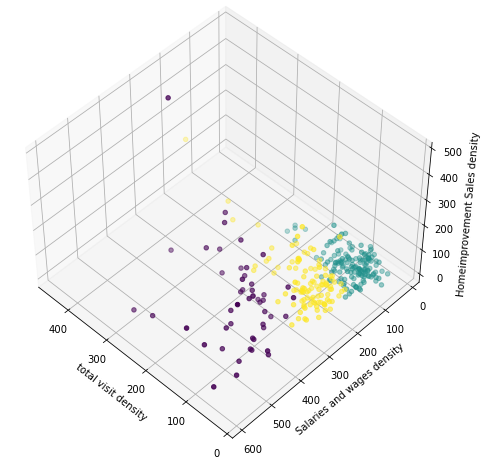

In [109]:
from mpl_toolkits.mplot3d import Axes3D 
fig = plt.figure(1, figsize=(8, 6))
plt.clf()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

plt.cla()
# plt.ylabel('Age', fontsize=18)
# plt.xlabel('Income', fontsize=16)
# plt.zlabel('Education', fontsize=16)
ax.set_xlabel('total visit density')
ax.set_ylabel('Salaries and wages density')
ax.set_zlabel('Homeimprovement Sales density')

ax.scatter(X[:, 0], X[:, 1], X[:, 2], c= k_means3_labels.astype(np.float64))